In [118]:
%pip install ipympl

Note: you may need to restart the kernel to use updated packages.


In [119]:
%matplotlib widget

In [120]:
import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
from ast import literal_eval


In [121]:
df = pd.read_csv("./cds-stellantis-symptoms-lookup-table_export.csv")

In [122]:
df = df[["symptoms", "symp_embeddings"]]

In [123]:
df['cat'] = 0 

In [124]:
#df[df[np.where(df['symptoms'].isin(["cel on"]))]]
df.loc[np.where(df['symptoms'].isin(["cel on", "check engine light on", "engine light on"]))]

,symptoms,symp_embeddings,cat
41,check engine light on,"[-0.019812554, -0.008862461, 0.012000557, -0.0...",0
58,engine light on,"[-0.006408318, -0.00855313, 0.014625199, -0.03...",0
536,cel on,"[0.012652698, -0.0154173905, 0.0083928155, -0....",0


In [125]:
df1 = df.sample(10)
df2 = df.loc[np.where(df['symptoms'].isin(["cel on", "check engine light on", "engine light on"]))]

In [126]:
# df3 = pd.concat([df1, df2])

In [127]:
# df3

In [128]:
df['cat'] = np.where(df['symptoms'].isin(["cel on", "check engine light on", "engine light on"]), 1, 0)

In [129]:
df['cat']

0      0
1      0
2      0
3      0
4      0
      ..
847    0
848    0
849    0
850    0
851    0
Name: cat, Length: 852, dtype: int64

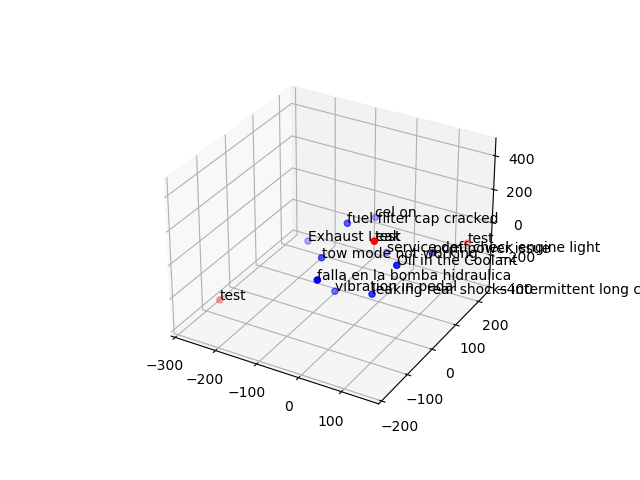

In [130]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

## 3 of interest
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# ax = fig.add_subplot()

matrix = np.array(df2.symp_embeddings.apply(literal_eval).to_list())
#print(matrix)
tsne = TSNE(n_components=3, perplexity=15, random_state=42, init='random', learning_rate='auto')
vis_dims = tsne.fit_transform(matrix)

x = [x for x,y,z in vis_dims]
y = [y for x,y,z in vis_dims]
z = [z for x,y,z in vis_dims]
ax.scatter(x, y, z, color = 'red')
for x,y,z in zip(x, y,z):                                       # <--
    ax.text(x,y,z, "test") # <--

### rest of points
#ax = fig.add_subplot(projection='3d')
matrix = np.array(df1.symp_embeddings.apply(literal_eval).to_list())
tsne = TSNE(n_components=3, perplexity=50, random_state=42, init='random', early_exaggeration=50, learning_rate='auto')
vis_dims = tsne.fit_transform(matrix)

x = [x for x,y,z in vis_dims]
y = [y for x,y,z in vis_dims]
z = [z for x,y,z in vis_dims]

label_list = df1.symptoms.tolist()

for i in range(0, len(label_list)):
    ax.text(x[i], y[i], z[i], label_list[i])
ax.scatter(x,y,z, color = 'blue')
# color_indices = df.symptoms.values - 1

plt.show()




In [131]:
df['symp_embeddings'] = df['symp_embeddings'].apply(lambda x : x.replace("[", "").replace("]", "").replace(" ", ""))

In [132]:
# _ = df['symp_embeddings'].tolist()

In [133]:
# len(df['symp_embeddings'].loc[0])

In [134]:
# df["symp_embeddings"].str.split(",")

In [135]:
df_embeddings = df['symp_embeddings'].str.split(",", expand=True)


In [136]:
df_new_cols = []

for i in range(0, 1536):
    df_new_cols.append("dim_" + str(i))
df_embeddings.columns = df_new_cols


In [137]:
df = df.reset_index()
df_embeddings = df_embeddings.reset_index()



In [138]:
df = df.merge(df_embeddings, on = "index").drop(columns=["index", "symp_embeddings"])

In [139]:
df

,symptoms,cat,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,...,dim_1526,dim_1527,dim_1528,dim_1529,dim_1530,dim_1531,dim_1532,dim_1533,dim_1534,dim_1535
0,Aftertreatment Diesel Exhaust Fluid Consumptio...,0,-0.008613779,0.010551015,-0.0058428408,-0.02555767,-0.03434442,0.015317998,-0.03968565,-0.018528273,...,0.0051544304,0.0019303168,0.037277948,-0.017947104,0.012654299,-0.018735835,-0.00892512,9.954277E-4,0.011609576,-0.0011848271
1,Aftertreatment Engine Out NOx Sensor Test Did ...,0,-0.0137487175,0.01049209,-0.015019271,0.003851781,-0.038972534,0.026922343,-0.016557308,-0.024046881,...,0.0012254147,0.03215167,0.035923205,-0.008231844,-0.0076567517,-0.0101376735,-0.007930924,0.004981904,0.0151931355,-0.022816451
2,Aftertreatment Selective Catalyst Reduction Sy...,0,-0.025860835,9.3502214E-4,0.0064443536,0.0096769575,-0.028724993,0.03033782,-0.0306437,-0.02969825,...,0.015015969,0.007758251,0.023525018,-0.009106907,-0.0058047846,-0.052694928,-0.018352851,-0.007494081,3.6193006E-4,0.004532598
3,Air Handling Performance Test did not complete,0,-0.030768884,0.005781261,-0.0089293355,-0.0027869616,-0.0058227284,0.017734267,-0.018259523,-0.012647588,...,0.012315848,0.008922424,0.027161213,-0.016766693,-9.4338565E-4,-0.026774183,-0.016186148,-0.009931467,0.012668321,-0.019503547
4,Coolant Temperature High,0,4.7822535E-4,0.012556653,-7.3425344E-4,-0.028655095,-0.021023538,0.02240016,-0.035631757,-0.008186216,...,0.01229603,-3.5877342E-4,0.04982565,-0.0036854676,-0.0064788046,0.013131358,-0.01109984,-0.0012053784,-0.008727509,0.006512218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,water leaking inside cab,0,0.0076034907,0.0058530965,0.009111736,-0.01995311,-0.0057873703,0.009762079,-0.01349118,-0.035506018,...,0.012398048,0.004663105,0.03990622,-0.01268171,-0.04306108,0.009582197,0.0025788909,-0.014473615,-0.02081101,-0.015082448
848,whining noise on start,0,-0.010870573,4.871646E-4,0.0022748432,-0.006763687,-0.018428596,0.0072402884,-0.022633508,-0.008632911,...,0.0018286629,-0.0013486812,0.012918946,-0.007977162,-0.006814389,0.034234192,-0.0051074116,-0.012256436,0.0059490697,-0.016508669
849,wif sensor failure,0,-0.01324654,0.0052250624,-0.033418193,0.0046248394,-0.009464788,0.012920407,-0.013822476,-0.012837139,...,0.012080789,0.011268926,0.011456279,-0.00951336,-0.040856797,0.034805994,-0.0050168927,0.0097423475,0.008021477,0.019776132
850,wont regen,0,-0.011932639,-0.013071695,0.008337066,0.023535913,5.29215E-4,0.0101485755,-0.026308073,-0.026582545,...,0.020105021,0.00819983,0.04838929,-0.0016065148,-0.027309893,0.032964002,-0.014780278,-0.01778574,-0.018485641,0.0099084135
